In [1]:
import numpy as np
from scipy.signal import chirp
from scipy.io.wavfile import write

In [2]:
def save_signal_as_wav(filename, signal, sampling_rate):
    if np.issubdtype(signal.dtype, np.floating):
        signal = np.int16(signal / np.max(np.abs(signal)) * 32767)
    
    # Write to WAV file
    write(filename, sampling_rate, signal)
    print(f"Audio file saved as: {filename}")

In [3]:
# Parameters
T_sec   = 5.0     # Duration of the chirp (in seconds)
T_start = 0.1     # Duration of silence at the start (in seconds)
T_end   = 0.1     # Duration of silence at the end (in seconds)
fs      = 44100   # Sampling rate (Hz)
f_start = 50      # Start frequency of the chirp (Hz)
f_end   = 2000    # End frequency of the chirp (Hz)

# Time array for the chirp
t = np.linspace(0, T_sec, int(T_sec * fs), endpoint=False)

# Generate the logarithmic chirp signal
chirp_signal = chirp(t, f0=f_start, t1=T_sec, f1=f_end, method='logarithmic')

# Generate silence arrays for the start and end
silence_start = np.zeros(int(T_start * fs))
silence_end   = np.zeros(int(T_end * fs))

# Concatenate silence at the beginning, the chirp, and silence at the end
final_signal = np.concatenate([silence_start, chirp_signal, silence_end])

# Save the final signal as a WAV file
save_signal_as_wav(f'./audio_samples/chirp_{f_start}_{f_end}_{T_sec}sec.wav', final_signal, fs)

Audio file saved as: ./audio_samples/chirp_50_2000_5.0sec.wav


# With fade in

Audio file saved as: ./audio_samples/DRUM_15_sec_100to10K_logarithmic_chirp_10.2.wav
total duration is 16.1 sec


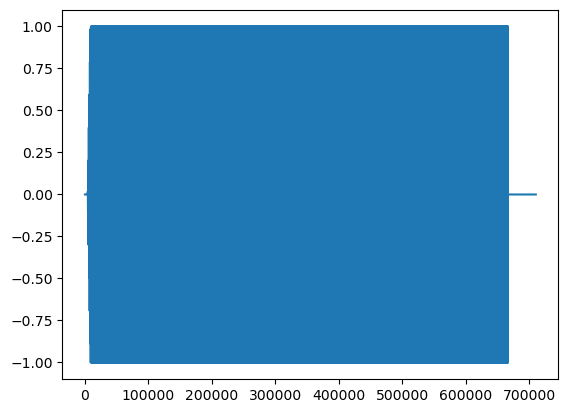

In [4]:
import numpy as np
from scipy.signal import chirp
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

def save_signal_as_wav(filename, signal, sampling_rate):
    if np.issubdtype(signal.dtype, np.floating):
        signal = np.int16(signal / np.max(np.abs(signal)) * 32767)
    
    # Write to WAV file
    write(filename, sampling_rate, signal)
    print(f"Audio file saved as: {filename}")

# Parameters
T_sec            = 15.0       # Duration of the chirp (in seconds)
T_start          =  0.1       # Duration of silence at the start (in seconds)
T_end            = 1          # Duration of silence at the end (in seconds)
fade_in_duration = 0.1        # Fade-in duration (in seconds)
fs               = 44100      # Sampling rate (Hz)
f_start          = 50         # Start frequency of the chirp (Hz)
f_end            = 10000      # End frequency of the chirp (Hz)

# Time array for the chirp
t = np.linspace(0, T_sec, int(T_sec * fs), endpoint=False)

# Generate the logarithmic chirp signal
chirp_signal = chirp(t, f0=f_start, t1=T_sec, f1=f_end, method='logarithmic')

# Apply fade-in
fade_samples = int(fade_in_duration * fs)
fade_in_envelope = np.linspace(0, 1, fade_samples)
chirp_signal[:fade_samples] *= fade_in_envelope

# Generate silence arrays for the start and end
silence_start = np.zeros(int(T_start * fs))
silence_end   = np.zeros(int(T_end * fs))

# Concatenate silence at the beginning, the chirp, and silence at the end
final_signal = np.concatenate([silence_start, chirp_signal, silence_end])
plt.figure()
plt.plot(final_signal)

# Save the final signal as a WAV file
save_signal_as_wav('./audio_samples/DRUM_15_sec_100to10K_logarithmic_chirp_10.2.wav', final_signal, fs)
print(f'total duration is {final_signal.shape[0]/fs} sec')


# With changing amplitude

Audio file saved as: ./audio_samples/DRUM_11s_70to10k_logchirp_quad_intensity_norm.wav
Total duration = 10.30 sec


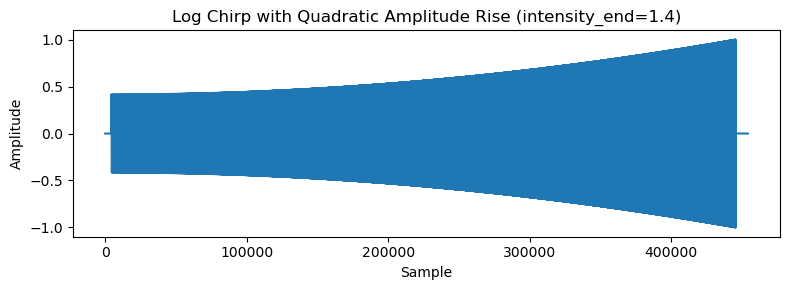

In [3]:
import numpy as np
from scipy.signal import chirp
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

def save_signal_as_wav(filename, signal, sampling_rate):
    """Same as your original — normalizes to full-scale ±32767."""
    if np.issubdtype(signal.dtype, np.floating):
        signal = np.int16(signal / np.max(np.abs(signal)) * 32767)
    write(filename, sampling_rate, signal)
    print(f"Audio file saved as: {filename}")

# Parameters
T_sec            = 10.0       # Chirp duration (sec)
T_start          = 0.1        # Silence before chirp (sec)
T_end            = 0.2        # Silence after chirp (sec)
fs               = 44100      # Sampling rate (Hz)
f_start          = 70         # Start frequency (Hz)
f_end            = 10000      # End frequency (Hz)
intensity_end    = 1.4        # Target relative intensity at end (can exceed 1.0)

# Time base and chirp
t = np.linspace(0, T_sec, int(T_sec * fs), endpoint=False)
chirp_signal = chirp(t, f0=f_start, t1=T_sec, f1=f_end, method='logarithmic')

# Quadratic amplitude envelope: e(t) = intensity_end * (t/T_sec)^2
tau = t / T_sec
envelope = 1 + intensity_end * (tau ** 2)


# Apply envelope to chirp
chirp_signal *= envelope

# Add silence at start and end
silence_start = np.zeros(int(T_start * fs))
silence_end   = np.zeros(int(T_end * fs))
final_signal  = np.concatenate([silence_start, chirp_signal, silence_end])

# Normalize final signal so max amplitude = 1
final_signal /= np.max(np.abs(final_signal))

# Plot preview
plt.figure(figsize=(8,3))
plt.plot(final_signal)
plt.title(f"Log Chirp with Quadratic Amplitude Rise (intensity_end={intensity_end})")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()

# Save WAV (automatically rescales to int16)
save_signal_as_wav(
    './audio_samples/DRUM_11s_70to10k_logchirp_quad_intensity_norm.wav',
    final_signal, fs
)

print(f"Total duration = {final_signal.shape[0] / fs:.2f} sec")


# Tone sequence

In [1]:
import numpy as np
from scipy.io.wavfile import write

def save_signal_as_wav(filename, signal, sampling_rate):
    if np.issubdtype(signal.dtype, np.floating):
        signal = np.int16(signal / np.max(np.abs(signal)) * 32767)
    
    write(filename, sampling_rate, signal)
    print(f"Audio file saved as: {filename}")

# Parameters
fs     = 44100          # Sampling rate (Hz)
T_tone = 0.5        # Duration of each tone (seconds)
T_break = 0.5       # Duration of silence between tones (seconds)
fade_duration = 0.1 # Duration of fade-in and fade-out (seconds)

freqs = [200,
         400,
         462.61]

# Time array for a single tone
t = np.linspace(0, T_tone, int(T_tone * fs), endpoint=False)

# Fade-in and fade-out envelope
fade_samples = int(fade_duration * fs)
envelope = np.ones_like(t)
fade_in = np.linspace(0, 1, fade_samples)
fade_out = np.linspace(1, 0, fade_samples)

# Apply fade-in and fade-out to envelope
envelope[:fade_samples] *= fade_in
envelope[-fade_samples:] *= fade_out

# Silence (break) array
silence = np.zeros(int(T_break * fs))

# Generate tones with fade and concatenate
tones = []
for f in freqs:
    tone = np.sin(2 * np.pi * f * t) * envelope
    tones.append(tone)
    tones.append(silence)  # Add silence after each tone

# Concatenate all tones and silences
final_signal = np.concatenate(tones)

# Save the final signal as a WAV file
save_signal_as_wav('./audio_samples/tones_matan.wav', final_signal, fs)

print(f'lenght is sec: {len(final_signal)/fs}')

Audio file saved as: ./audio_samples/tones_matan.wav
lenght is sec: 3.0


In [5]:
import winsound

wav_filename = './audio_samples/never_10K_4sec.wav'
winsound.PlaySound(wav_filename, winsound.SND_FILENAME | winsound.SND_ASYNC)

In [10]:
import os

wav_filename = 'C:/Users/markshe/Dropbox/Research/PROJECT_SPECKLE_NEW/code/audio_samples/2_sec_logarithmic_chirp.wav'
os.startfile(wav_filename)